# Import Library

In [14]:
import statsmodels.api as sm
import ccxt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import requests
from statsmodels.tsa.stattools import coint

# Fetch Data

## BTC/USDT

In [15]:
binance = ccxt.binance()

In [16]:
since_timestamp = 1700510400000
until_timestamp = 1702481582000

limit = 1000
btc_usdt_ohlcv = []

while since_timestamp < until_timestamp:
    ohlcv_part = binance.fetch_ohlcv('BTC/USDT', '1m', since=since_timestamp, limit=limit)
    if not ohlcv_part:
        break
    btc_usdt_ohlcv.extend(ohlcv_part)
    since_timestamp = ohlcv_part[-1][0] + 1

In [17]:
btc_usdt_df = pd.DataFrame(btc_usdt_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
btc_usdt_df['timestamp'] = pd.to_datetime(btc_usdt_df['timestamp'], unit='ms') 
btc_usdt_df.set_index('timestamp', inplace=True)
btc_usdt_df

,open,high,low,close,volume
timestamp,,,,,
2023-11-20 20:00:00,37569.23,37572.28,37561.10,37561.11,11.41956
2023-11-20 20:01:00,37561.11,37569.33,37548.00,37562.09,16.97407
2023-11-20 20:02:00,37562.10,37570.73,37553.44,37555.99,10.56626
2023-11-20 20:03:00,37555.99,37586.00,37555.99,37585.99,30.81977
2023-11-20 20:04:00,37586.00,37597.62,37574.71,37574.72,25.53183
...,...,...,...,...,...
2023-12-13 17:55:00,42116.00,42130.19,42100.00,42106.00,79.55163
2023-12-13 17:56:00,42105.99,42106.00,42091.65,42098.08,22.36403
2023-12-13 17:57:00,42098.08,42111.48,42078.78,42111.48,35.07519


## BTC/THB

In [18]:
btc_thb_url = "https://api.bitkub.com/tradingview/history?symbol={symbol}&resolution={timeframe}&from=1700510400&to=1702481582".format(symbol='BTC_THB', timeframe="1")
btc_thb_response = requests.get(btc_thb_url)
btc_thb_data = btc_thb_response.json()
del btc_thb_data["s"]
btc_thb_df = pd.DataFrame(btc_thb_data).rename(columns={
    "c": "close",
    "h": "high",
    "l": "low",
    "o": "open",
    "t": "timestamp",
    "v": "volume"
})
btc_thb_df['timestamp'] = pd.to_datetime(btc_thb_df['timestamp'], unit='s') 
btc_thb_df.set_index('timestamp', inplace=True)
btc_thb_df.head()

,close,high,low,open,volume
timestamp,,,,,
2023-11-20 20:00:00,1322000.00,1322000.00,1322000.00,1322000.00,0.000151
2023-11-20 20:03:00,1321871.60,1321871.60,1321871.60,1321871.60,0.009430
2023-11-20 20:04:00,1322000.00,1322000.00,1322000.00,1322000.00,0.017560
2023-11-20 20:07:00,1321871.26,1321871.26,1321871.26,1321871.26,0.000016
2023-11-20 20:09:00,1320621.76,1320621.76,1320621.76,1320621.76,0.001231


In [19]:
btc_thb_df.tail()

,close,high,low,open,volume
timestamp,,,,,
2023-12-13 15:29:00,1492711.66,1493599.85,1492608.00,1492608.00,0.001555
2023-12-13 15:30:00,1492711.45,1492711.76,1492319.97,1492532.06,0.007485
2023-12-13 15:31:00,1492711.76,1492711.76,1492320.67,1492320.67,0.000071
2023-12-13 15:32:00,1492711.86,1492711.86,1492419.27,1492419.27,0.563485
2023-12-13 15:33:00,1494163.48,1497416.00,1493023.63,1493023.63,0.230493


## USDT/THB

In [20]:
usdt_thb_url = "https://api.bitkub.com/tradingview/history?symbol={symbol}&resolution={timeframe}&from=1700488800&to=1702481582".format(symbol='USDT_THB', timeframe="1")
usdt_thb_response = requests.get(usdt_thb_url)
usdt_thb_data = usdt_thb_response.json()
del usdt_thb_data["s"]
usdt_thb_df = pd.DataFrame(usdt_thb_data).rename(columns={
    "c": "close_forex",
    "h": "high_forex",
    "l": "low_forex",
    "o": "open_forex",
    "t": "timestamp",
    "v": "volume_forex",
})
usdt_thb_df['timestamp'] = pd.to_datetime(usdt_thb_df['timestamp'], unit='s') 
usdt_thb_df.set_index('timestamp', inplace=True)
usdt_thb_df.tail()

,close_forex,high_forex,low_forex,open_forex,volume_forex
timestamp,,,,,
2023-12-13 15:29:00,35.73,35.73,35.72,35.73,2094.39
2023-12-13 15:30:00,35.72,35.73,35.72,35.73,550.15
2023-12-13 15:31:00,35.73,35.73,35.72,35.72,17123.49
2023-12-13 15:32:00,35.73,35.73,35.72,35.73,1109.56
2023-12-13 15:33:00,35.73,35.73,35.73,35.73,335.17


# Processing Data

In [21]:
merge_df = pd.merge(btc_thb_df, btc_usdt_df, on='timestamp', suffixes=('_thb', '_usdt'))
merge_df = pd.merge(merge_df, usdt_thb_df, on='timestamp', suffixes=('', '_forex'))

merge_df["convert_close_usdt"] = merge_df["close_usdt"] * merge_df["close_forex"]
merge_df["usdt_thb_diff"] = merge_df["convert_close_usdt"]-merge_df["close_thb"]

In [22]:
merge_df[['close_usdt','close_thb',"close_forex","convert_close_usdt","usdt_thb_diff"]].head()

,close_usdt,close_thb,close_forex,convert_close_usdt,usdt_thb_diff
timestamp,,,,,
2023-11-20 20:03:00,37585.99,1321871.60,35.19,1.322651e+06,779.3881
2023-11-20 20:04:00,37574.72,1322000.00,35.19,1.322254e+06,254.3968
2023-11-20 20:07:00,37522.07,1321871.26,35.21,1.321152e+06,-719.1753
2023-11-20 20:09:00,37522.37,1320621.76,35.20,1.320787e+06,165.6640
2023-11-20 20:10:00,37531.10,1321867.05,35.20,1.321095e+06,-772.3300


In [23]:
# Perform cointegration test
result = coint(merge_df['close_thb'], merge_df['convert_close_usdt'])

# Extract test statistic and p-value
test_statistic, p_value, _ = result

# Print results
print('Cointegration Test:')
print('Test Statistic:', test_statistic)
print('p-value:', p_value)
print('Is Cointegrated:', p_value <= 0.05)

Cointegration Test:
Test Statistic: -11.49656835506339
p-value: 5.490538360684317e-20
Is Cointegrated: True


# Plot Data

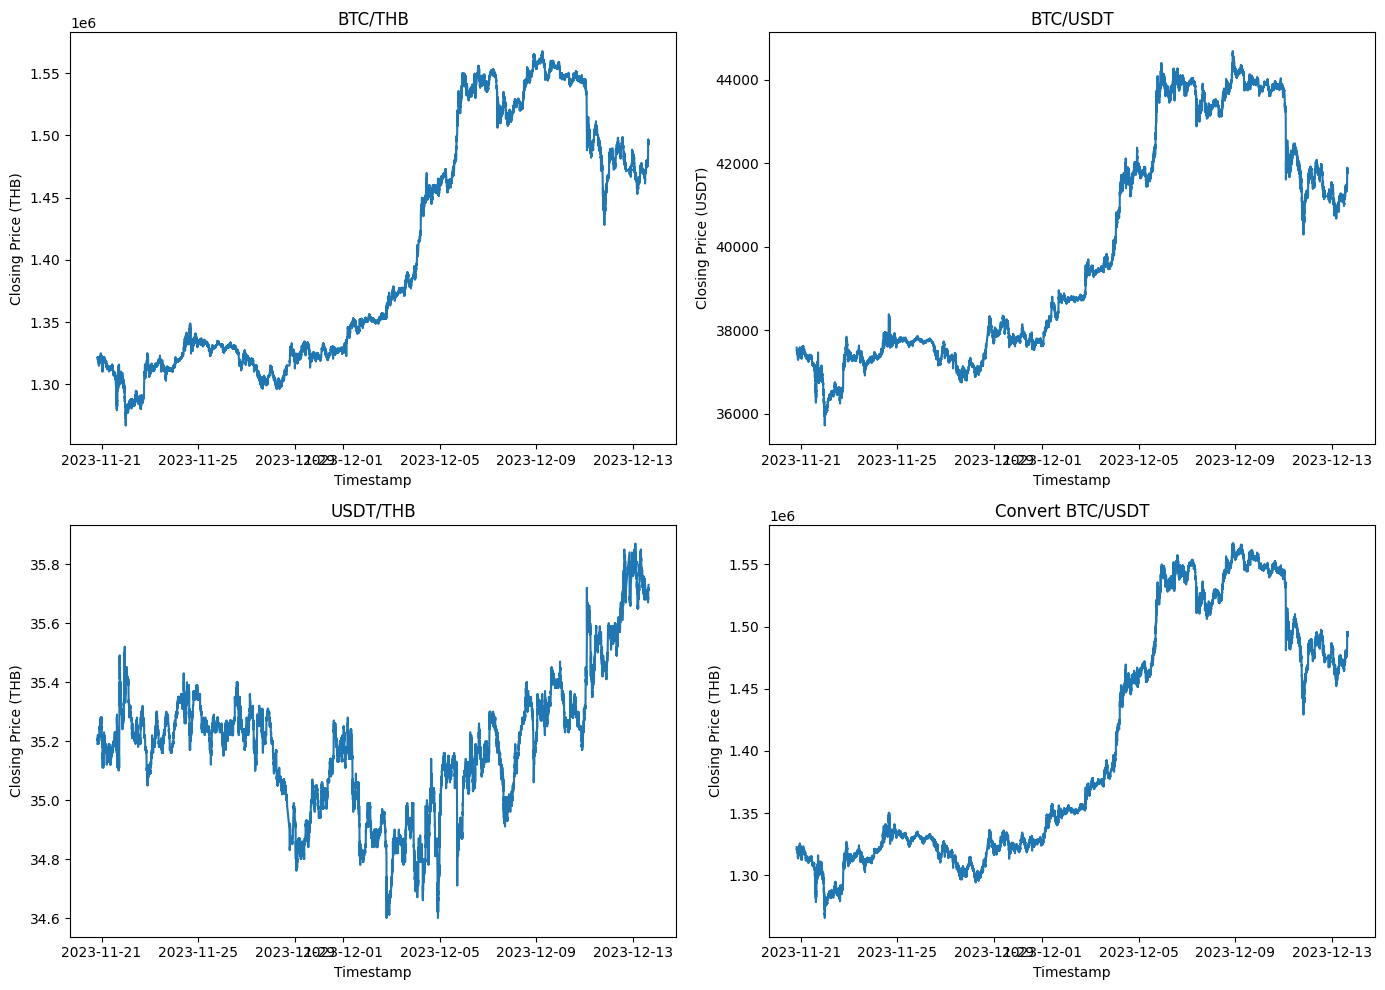

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes[0, 0].plot(merge_df["close_thb"])
axes[0, 0].set_title("BTC/THB")
axes[0, 0].set_xlabel("Timestamp")
axes[0, 0].set_ylabel("Closing Price (THB)")

axes[0, 1].plot(merge_df["close_usdt"])
axes[0, 1].set_title("BTC/USDT")
axes[0, 1].set_xlabel("Timestamp")
axes[0, 1].set_ylabel("Closing Price (USDT)")

axes[1,0].plot(merge_df["close_forex"])
axes[1,0].set_title("USDT/THB")
axes[1,0].set_xlabel("Timestamp")
axes[1,0].set_ylabel("Closing Price (THB)")

axes[1,1].plot(merge_df["convert_close_usdt"])
axes[1,1].set_title("Convert BTC/USDT")
axes[1,1].set_xlabel("Timestamp")
axes[1,1].set_ylabel("Closing Price (THB)")

plt.tight_layout()
plt.show()

In [25]:
close_thb = sm.add_constant(merge_df['close_thb'].to_list())
convert_close_usdt = merge_df['convert_close_usdt'].to_list()
results = sm.OLS(convert_close_usdt, close_thb).fit()
beta= results.params[1]

print("beta value: ",beta)

beta value:  1.0002873871459907


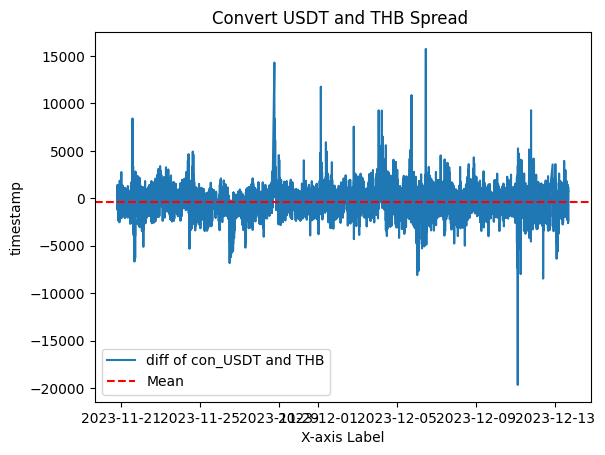

In [26]:
merge_df["spread"] = merge_df['convert_close_usdt'] - beta* merge_df['close_thb']
spread_mean = merge_df["spread"].mean()


plt.plot(merge_df["spread"], label='diff of con_USDT and THB')
plt.axhline(spread_mean, color='red', linestyle='--', label='Mean')

plt.xlabel('X-axis Label')
plt.ylabel('timestamp')
plt.title('Convert USDT and THB Spread ')

plt.legend()
plt.show()